# **RNN Introduction**


## Importing required libraries


In [1]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.3 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import math
import random
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error

## Loading and preprocessing the data
### Dataset 4-Deep learning/5-Time Series Forecasting (RNN)/LAB/ٌDatasets/traffic.csv

In [23]:
traffic = pd.read_csv('/content/traffic.csv', parse_dates=['DateTime'])
traffic.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [24]:
traffic.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')

In [25]:
traffic.isna().sum()

,0
DateTime,0
Junction,0
Vehicles,0
ID,0


In [26]:
traffic.duplicated().sum()

0

In [30]:
traffic.drop(columns = ['ID'], axis=1)

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9
...,...,...,...
48115,2017-06-30 19:00:00,4,11
48116,2017-06-30 20:00:00,4,30
48117,2017-06-30 21:00:00,4,16
48118,2017-06-30 22:00:00,4,22


## Visualization

In [31]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


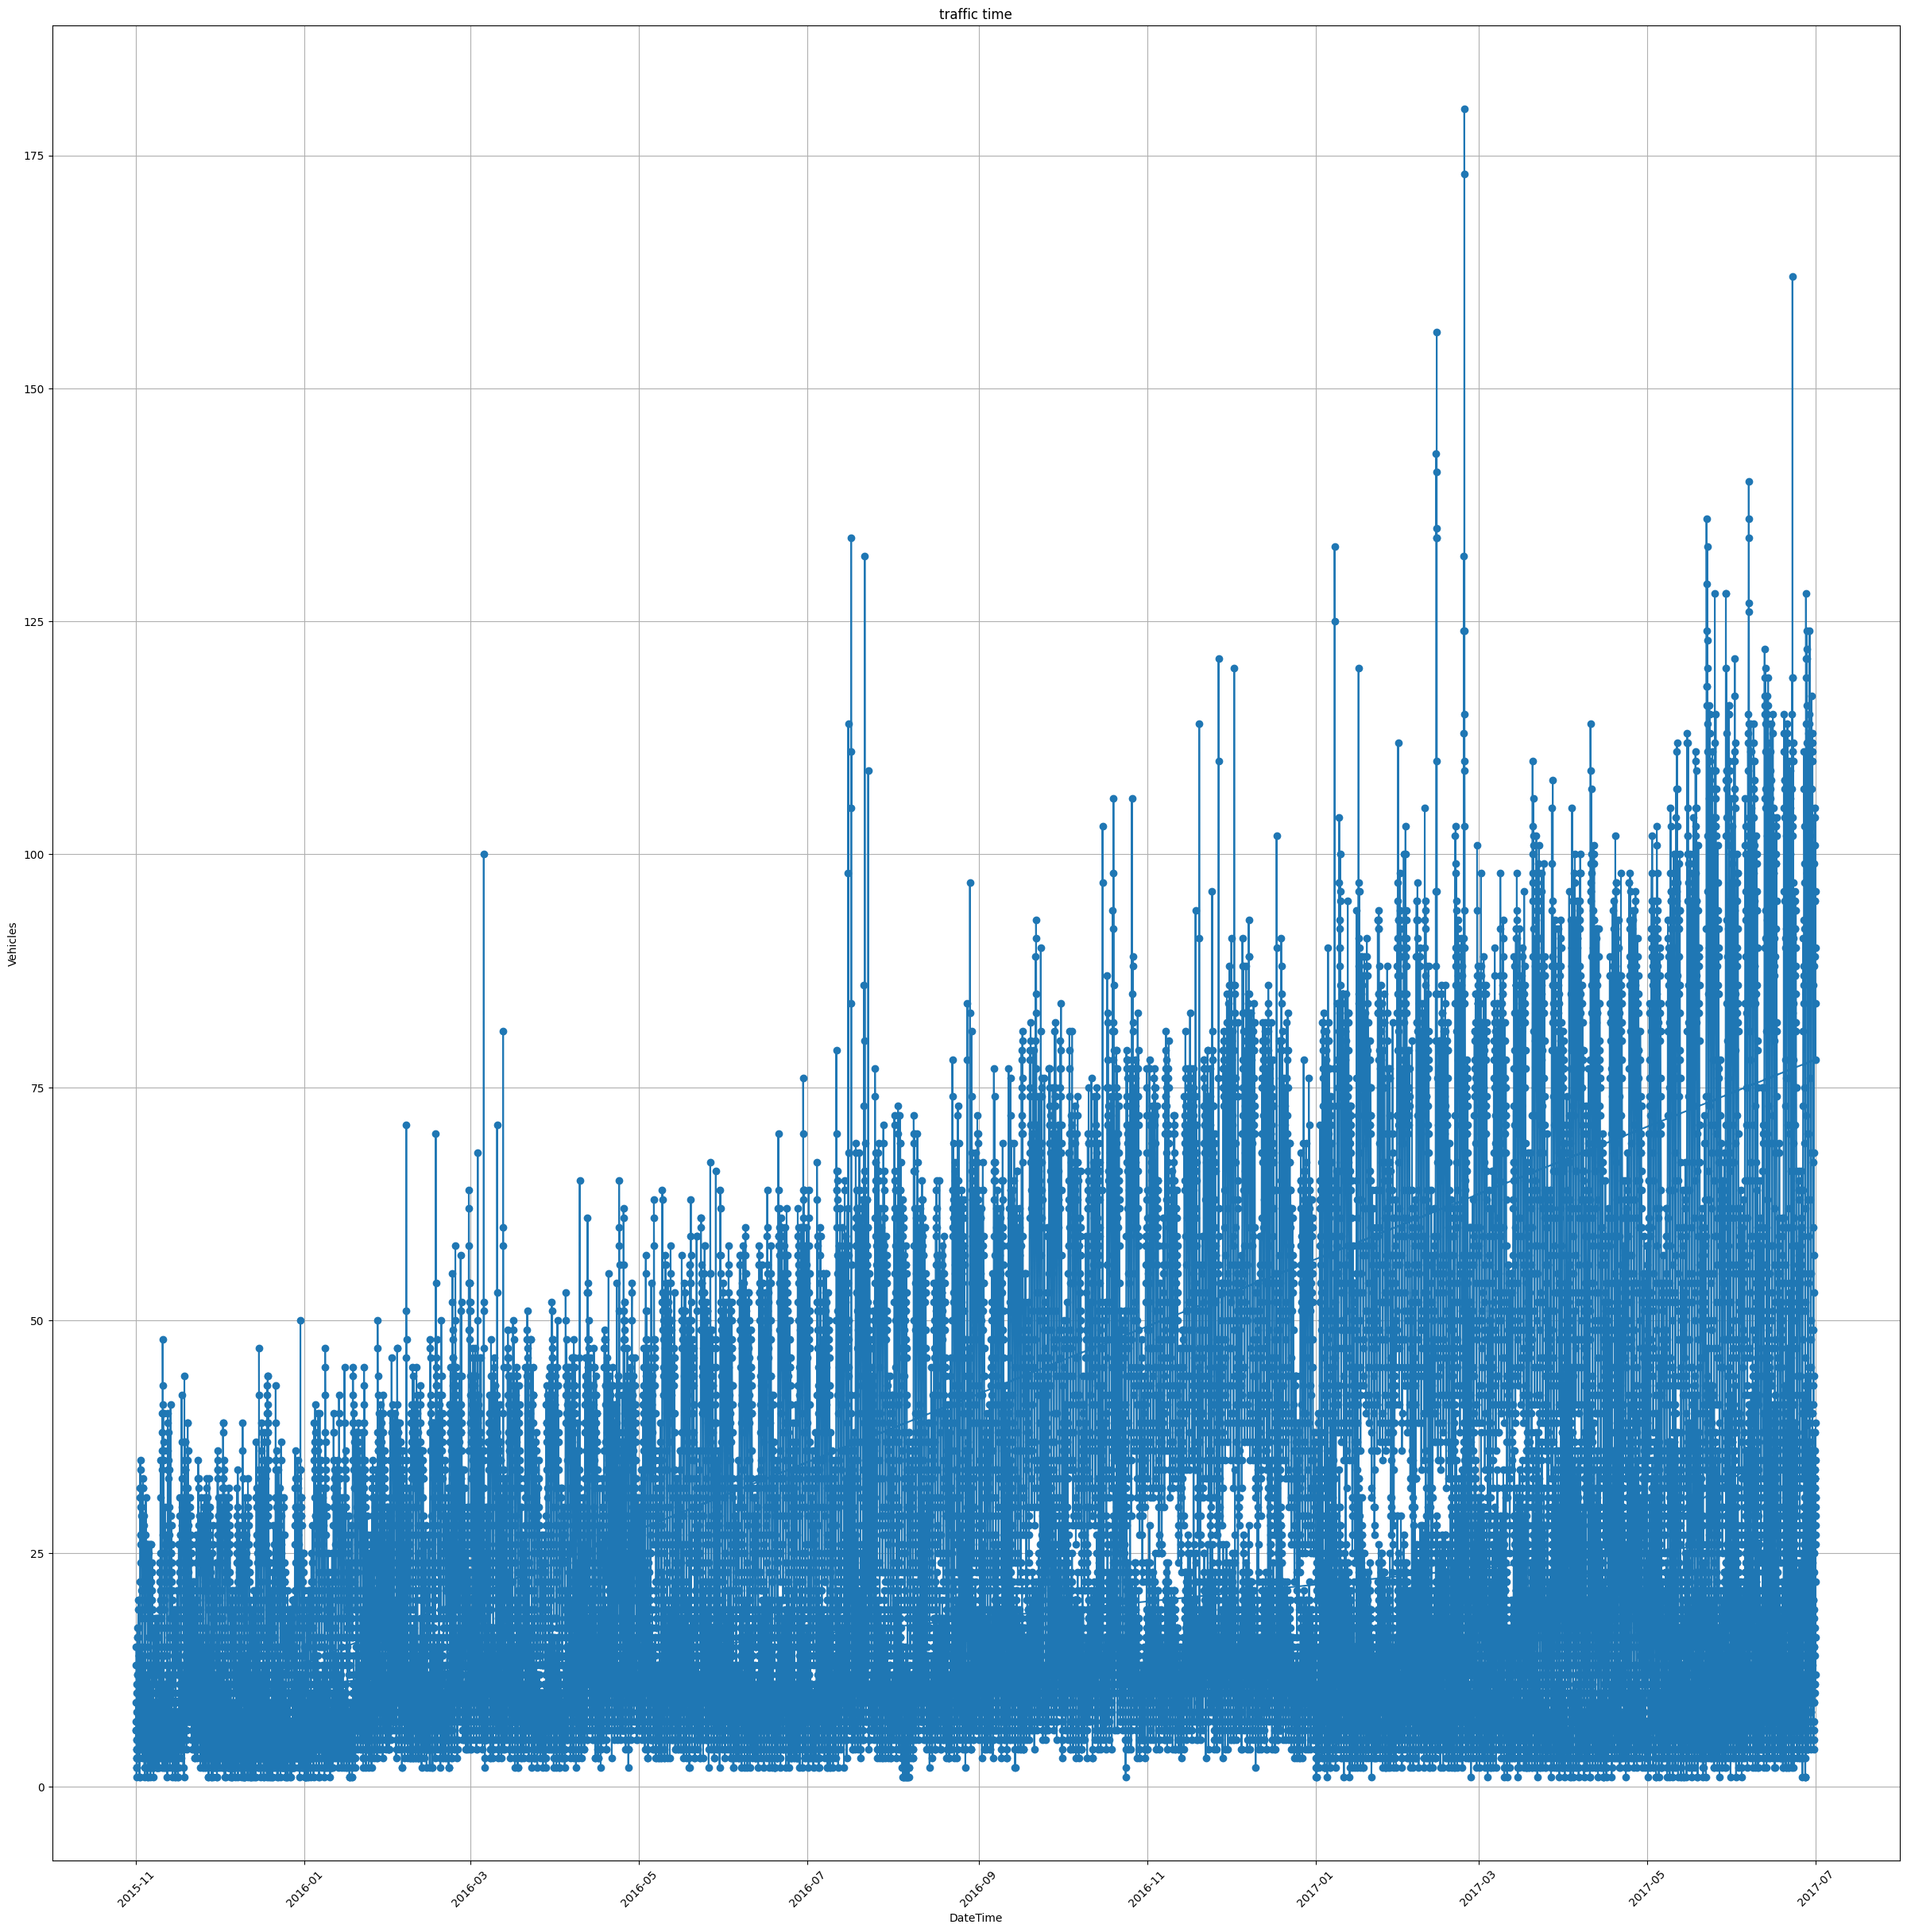

In [36]:
traffic['DateTime']  = pd.to_datetime(traffic['DateTime'])
plt.figure(figsize=(20, 10))
plt.plot(traffic['DateTime'], traffic['Vehicles'], marker='o')
plt.title('traffic time')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Split the data into train and test

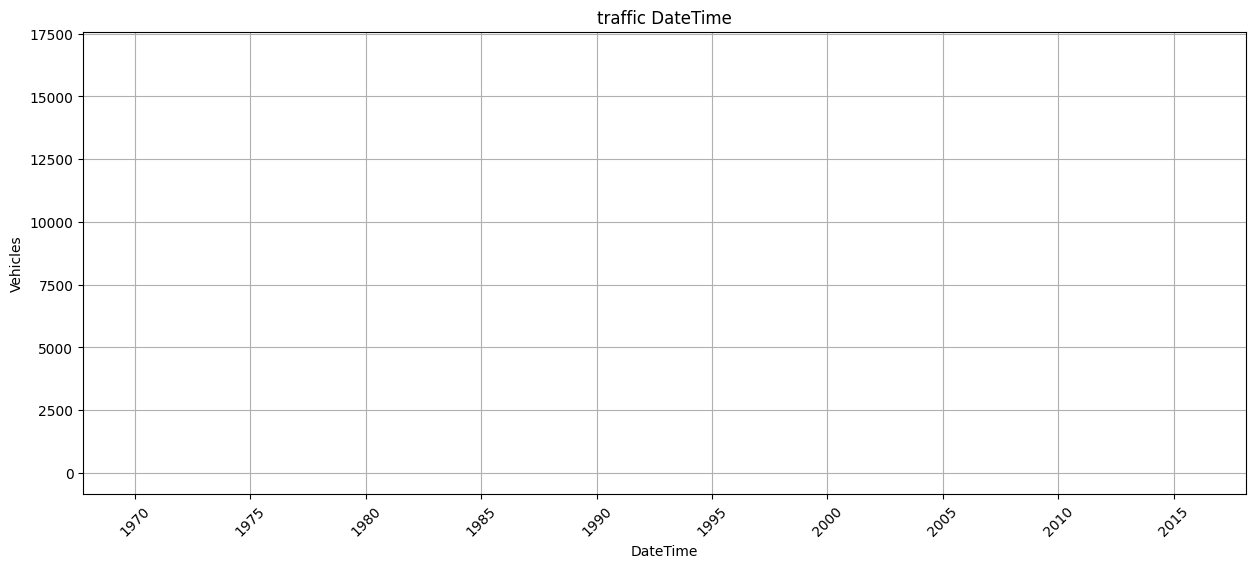

In [41]:

matplotlib_date = mdates.date2num(traffic['DateTime'])

# Create an array of tuples in the required format
ohlc = np.vstack((matplotlib_date, traffic['Vehicles']))#, traffic['Junction']))

plt.figure(figsize=(15, 6))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')
ax.xaxis_date()
plt.title('traffic DateTime')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Modeling


## Visualization of results
